In [2]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
losses = pd.read_csv("./processed.csv")
s = losses.s.to_numpy()
f = losses.s.to_numpy()
X = np.stack((s, f), axis=1)
y = losses.label.to_numpy()

In [39]:
losses = np.load("./disc_loss_eval.npy")
X = losses[:,0:7].astype("float")
y = losses[:,8].astype("float")

In [29]:
X.shape, y.shape

((71113, 7), (71113,))

## SVM

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [5]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [6]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [7]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (Polynomial Kernel):  89.43
F1 (Polynomial Kernel):  84.43
Accuracy (RBF Kernel):  89.43
F1 (RBF Kernel):  84.43


In [22]:
scores = poly.predict(X)
scores

array([0., 0., 0., ..., 0., 0., 0.])

## Naive network and random network

In [20]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# using extracted features from GAN discriminator
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=10)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
2538/2538 [==============================] - 3s 920us/step - loss: 0.3044 - accuracy: 0.8943
Epoch 2/100
2538/2538 [==============================] - 2s 911us/step - loss: 0.2870 - accuracy: 0.8984
Epoch 3/100
2538/2538 [==============================] - 2s 914us/step - loss: 0.2845 - accuracy: 0.8984
Epoch 4/100
2538/2538 [==============================] - 2s 913us/step - loss: 0.2828 - accuracy: 0.8983
Epoch 5/100
2538/2538 [==============================] - 2s 916us/step - loss: 0.2814 - accuracy: 0.8985
Epoch 6/100
2538/2538 [==============================] - 2s 911us/step - loss: 0.2807 - accuracy: 0.8985
Epoch 7/100
2538/2538 [==============================] - 2s 916us/step - loss: 0.2797 - accuracy: 0.8984
Epoch 8/100
2538/2538 [==============================] - 2s 919us/step - loss: 0.2791 - accuracy: 0.8990
Epoch 9/100
2538/2538 [==============================] - 2s 910us/step - loss: 0.2782 - accuracy: 0.8982
Epoch 10/100
2538/2538 [==============================]

2538/2538 [==============================] - 2s 916us/step - loss: 0.2634 - accuracy: 0.9016
Epoch 79/100
2538/2538 [==============================] - 2s 913us/step - loss: 0.2633 - accuracy: 0.9015
Epoch 80/100
2538/2538 [==============================] - 2s 916us/step - loss: 0.2630 - accuracy: 0.9011
Epoch 81/100
2538/2538 [==============================] - 2s 916us/step - loss: 0.2633 - accuracy: 0.9015
Epoch 82/100
2538/2538 [==============================] - 2s 918us/step - loss: 0.2632 - accuracy: 0.9003
Epoch 83/100
2538/2538 [==============================] - 2s 916us/step - loss: 0.2632 - accuracy: 0.9009
Epoch 84/100
2538/2538 [==============================] - 2s 913us/step - loss: 0.2632 - accuracy: 0.9008
Epoch 85/100
2538/2538 [==============================] - 2s 912us/step - loss: 0.2631 - accuracy: 0.9013
Epoch 86/100
2538/2538 [==============================] - ETA: 0s - loss: 0.2628 - accuracy: 0.90 - 2s 913us/step - loss: 0.2627 - accuracy: 0.9009
Epoch 87/100
2538

In [35]:
# using random numbers as features
X_rand = np.random.randn(X.shape[0], X.shape[1])
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_rand, y, epochs=100, batch_size=10)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
2538/2538 [==============================] - 3s 916us/step - loss: 0.3562 - accuracy: 0.8859
Epoch 2/100
2538/2538 [==============================] - 2s 913us/step - loss: 0.3313 - accuracy: 0.8983
Epoch 3/100
2538/2538 [==============================] - 2s 911us/step - loss: 0.3301 - accuracy: 0.8983
Epoch 4/100
2538/2538 [==============================] - 2s 916us/step - loss: 0.3294 - accuracy: 0.8983
Epoch 5/100
2538/2538 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.89 - 2s 914us/step - loss: 0.3291 - accuracy: 0.8983
Epoch 6/100
2538/2538 [==============================] - 2s 911us/step - loss: 0.3287 - accuracy: 0.8983
Epoch 7/100
2538/2538 [==============================] - 2s 904us/step - loss: 0.3285 - accuracy: 0.8983
Epoch 8/100
2538/2538 [==============================] - 2s 907us/step - loss: 0.3285 - accuracy: 0.8983
Epoch 9/100
2538/2538 [==============================] - 2s 912us/step - loss: 0.3281 - accuracy: 0.8983
Epoch 10/100


2538/2538 [==============================] - 2s 913us/step - loss: 0.3253 - accuracy: 0.8984
Epoch 78/100
2538/2538 [==============================] - 2s 912us/step - loss: 0.3253 - accuracy: 0.8983
Epoch 79/100
2538/2538 [==============================] - 2s 911us/step - loss: 0.3251 - accuracy: 0.89830s - loss: 0.3251 - accu
Epoch 80/100
2538/2538 [==============================] - 2s 914us/step - loss: 0.3252 - accuracy: 0.8983
Epoch 81/100
2538/2538 [==============================] - 2s 913us/step - loss: 0.3250 - accuracy: 0.8983
Epoch 82/100
2538/2538 [==============================] - 2s 934us/step - loss: 0.3251 - accuracy: 0.8983
Epoch 83/100
2538/2538 [==============================] - 2s 912us/step - loss: 0.3251 - accuracy: 0.8983
Epoch 84/100
2538/2538 [==============================] - 2s 913us/step - loss: 0.3252 - accuracy: 0.8983
Epoch 85/100
2538/2538 [==============================] - 2s 909us/step - loss: 0.3252 - accuracy: 0.8984
Epoch 86/100
2538/2538 [===========

## Keras resnet/vgg

## Test

In [40]:
scores = model.predict(X)
scores

array([[0.11824239],
       [0.1072495 ],
       [0.11712009],
       ...,
       [0.11333235],
       [0.11070741],
       [0.11838475]], dtype=float32)

In [41]:
res = np.stack((scores[:, 0], y), axis = 1)
import pandas as pd 
pd.DataFrame(res).to_csv("scores.csv",header=None, index=None)

In [42]:
# eer and thresholds
from eval_metrics import compute_eer

target_scores = []
nontarget_scores = []
for i in res:
    if i[1] == 1: 
        target_scores += [i[0]]
    else: nontarget_scores += [i[0]]

print(len(target_scores), len(nontarget_scores))

eer, thresholds = compute_eer(np.array(target_scores), np.array(nontarget_scores))

eer, thresholds

7339 63774


(0.4812788972374955, 0.11148794740438461)

In [43]:
# confusion matrix
res[res[:, 0] >= thresholds] = 1
res[res[:, 0] < thresholds] = 0

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(res[:, 1], res[:, 0])

print(cf_matrix)

[[36611     0]
 [    0 34502]]


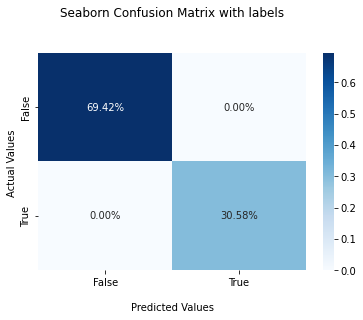

In [26]:
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Using random features:
train:(0.5321598327213382, 0.11188706010580063)
eval: (0.4812788972374955, 0.11148794740438461)
### Using extracted features:
train:(0.2561928804569563, 0.13007508218288422) -> 100 epochs, not converged
eval:(0.23355296771100248, 0.12094078958034515)